# z-Transformation

In diesem Abschnitt werden wir die z-Transformation als ein wichtiges
Werkzeug zur Analyse und zum Verständnis von LTI-Systemen und ihrer
Eigenschaften einführen. Es werden durch die z-Übertragungsfunktion und
dem Pol-Nullstellenplot neue Beschreibungsformen für LTI-Systeme
aufgezeigt. Insbesondere wird eine Möglichkeit angegeben, um die
Stabilität rekursiver LTI-Systeme zu testen.

```{admonition} To Do
:class: error
Beispiel bringen mit Programm (Minihost, Asio4All, pcx) zur Motivation
```


## Einführung

Um die Nützlichlkeit dieses Werkzeuges zu untermalen, wollen wir
zunächst von einfachen Beispielen ausgehen.

Angenommen auf ein Sparbuch wird ein bestimmter Geldbetrag $S$
eingezahlt und dieser Betrag wird jährlich mit einem Zins $p$ verzinst.
Eine mathematische Darstellung dieses Sachverhalts ergibt sich durch
Nutzung des Delta-Impulses gewichtet mit dem Geldbetrag und einer
einfachen Rekursion, wobei ein leeres Konto als Startwert vorliegt. Es
gilt also $y(k-1) = 0$. 

$$
y(k) = (1+p) y(k-1) + S \delta(k)
$$ (eq:ZinsRekursion)

Dies ist eine andere Darstellung der Zinseszinsrechenregel. Diese lautet

$$
\mbox{Geld} = S (1+p)^{\mbox{Jahre}}
$$

Die Anzahl der Jahre ist in Formel
{eq}`eq:ZinsRekursion` in der Anzahl der Rekursionen versteckt.
Die zweite Form ist eine direkte Berechnung.

Nun lassen sich aber nicht für alle Rekursionssysteme solche einfachen
direkten Rechenvorschriften angeben. Aber wie ist der mathematische
Zusammenhang zwischen den beiden möglichen Lösungen?

In der Rekursionsformel: 

$$
    y(k) = (1+p) y(k-1) + S \delta(k)
$$ (eq:ZinsRekursionWiederholung) 

ergibt sich durch Variablensubstitution $c = 1+p$. 

$$
y(k) = c y(k-1) + S \delta(k)
$$ (eq:ZinsRekursionMitc)

Diese Form wird jetzt auf beiden
Seiten mit der Summe $\sum_{k =
-\infty}^{\infty}z^{-k}$ multipliziert. Ein Schritt der mathematisch
erlaubt ist, da er auf beiden Seiten des Gleichungssystems durchgeführt
wird.

$$
\sum_{k = -\infty}^{\infty} y(k) z^{-k} = \underbrace{c \sum_{k =
-\infty}^{\infty} y(k-1) z^{-k}}_{\mbox{1. Summand}} +
\underbrace{S \sum_{k = -\infty}^{\infty} \delta(k)
z^{-k}}_{\mbox{2. Summand}}
$$ (eq:ZinsRekursionZ)

Mit Hilfe der abkürzenden Schreibweise

$$
Y(z) = \sum_{k = -\infty}^{\infty} y(k) z^{-k} .
$$ (eq:Def:zTrafo)

ergibt sich bei dem 2. Summanden nur ein Element der Summe den Wert $S$, da die $\delta$-Folge nur bei $k = 0$ einen Wert ungleich Null hat.

Zusätzlich kann der 1. Summand durch eine Variablensubstitution
$k' = k-1$ umgeformt werden. 

$$
    c \sum_{k =
-\infty}^{\infty} y(k-1) z^{-k} = c \sum_{k' = -\infty}^{\infty}
y(k') z^{-k'-1} =c z^{-1}\sum_{k' = -\infty}^{\infty} y(k')
z^{-k'}=c z^{-1} Y(z)
$$ (eq:zTrafo:Example1Subst)

Somit ergibt sich 

$$
    Y(z) = c z^{-1} Y(z) + S .
$$ (eq:zTrafo:Example1)

Umgestellt folgt

$$
    Y(z) = \frac{S}{1-c z^{-1}} .
$$ (eq:ztrafo:Example1:zLoesung)

Um zur Lösung für das Ausgangssignal zu kommen, wird die Summenformel
für eine geometrische Reihe eingeführt.

$$
\sum_{k = 0}^{\infty} q^k = \frac{1}{1-q}  \quad \mbox{wenn} \quad |q|<1
$$ (eq:Def:geometrischeReihe)

Für Gleichung
{eq}`eq:ztrafo:Example1:zLoesung` ergibt sich also

$$
\frac{S}{1-c z^{-1}} = S \sum_{k = 0}^{\infty} (c z^{-1})^k = S \sum_{k = 0}^{\infty} c^k z^{-k}
$$ (eq:zTrafo:Example1:kLoesung1)

Vergleicht man diese Lösung mit
{eq}`eq:Def:zTrafo` ergibt sich

$$
    y(k) = \bigg\{ \begin{array}{lcc}
      S c^k & & k \geq 0\\
        0  & & k<0
    \end{array} = S(1+p)^k \gamma(k)
$$ (eq:zTrafo:Example1:kLoesung2)

mit $\gamma(k)$ als Sprungfolge (siehe Gleichung
{eq}`eq:Def:Sprungfolge`).

Dies entspricht der vorher bekannten Lösung für die Zinseszinsformel.

## Definition

Für eine verkürzte Schreibweise wird für die z-Transformation folgendes
Symbol eingeführt 

$$
\mathcal{Z}\{ \cdot \}= \sum_{k = -\infty}^{\infty} (\cdot) z^{-k} mit~z \in \mathbb{C}
$$ (eq:Def:Ztrafo)

Es gilt also 

$$
    Y(z) =\mathcal{Z}\{y(k)\}
$$ (eq:yExample) 

Die Rechenvorschrift führt dazu, dass die diskrete
Eingangsfolge $y(k)$ abgebildet wird auf eine komplexe Ebene. Man
spricht deshalb auch von Zeitbereichsdarstellung und
Bildbereichdarstellung. Um die Korrespondenz zu symbolisieren wird
häufig der sog. "Transformationsknochen" verwendet.

-   Hintransformation: $y(k) \circ \hskip-1ex -\hskip-1.2ex -\hskip-1.2ex- \hskip-1ex \bullet\; Y(z)$ oder bei Gleichungsabfolgen vertikal

-   Rücktransformation: $Y(z) \bullet \hskip-1ex -\hskip-1.2ex -\hskip-1.2ex- \hskip-1ex \circ\; y(k)$

Damit eine z-Transformation gültig ist, muss zusätzlich gelten, dass die
Summe in Gl. {eq}`eq:Def:Ztrafo` kleiner unendlich ist. Dies ist für alle
endlichen Folgen gegeben, wenn keiner der Folgenwerte unendlich ist. Bei
unendlichen Folgen ist dies nicht immer gewährleistet.und hängt auch
direkt von der Wahl des $z$ ab. Deshalb gehört zu einer vollständigen
Beschreibung der z-Transformation auch immer die Bereichsangabe von $z$
in der die Summe konvergiert. Man spricht deshalb vom sogenannten
Konvergenzgebiet *Region of Convergence*. Zur Beschreibung des
Konvergenzgebietes reichen die Angaben der Radien $r = |z|$ der
komplexen Zahlen aus. Für das Konvergenzgebiet ergibt sich entweder das
Gebiet inner- oder außerhalb einer Kreisfläche oder das Gebiet hat die
Form eines Kreisringes in der z-Ebene.


```{figure} ../images/psZ/ROC_Kausal.png
---
width: 50%
name: fig:ROC_Kausal
---
Veranschaulichung des Konvergenzgebietes bei der z-Transformation. In
diesem Beispiel für eine kausale Folge (ROC
außerhalb).
```

In [ ]:
import matplotlib
import numpy
from matplotlib import pyplot
from myst_nb import glue

matplotlib.style.use('sv.mplstyle')

index_kausal = numpy.linspace(-10, 10, 21)
amplitude_kausal = [0]*len(index_kausal)
mid_kausal = int(numpy.floor(len(index_kausal)/2))
for idx in range(len(index_kausal)-mid_kausal):
    amplitude_kausal[idx+mid_kausal] = 0.5**idx

fig, (ax_kausal, ax_nkausal) = pyplot.subplots(1, 2)
ax_kausal.stem(index_kausal, amplitude_kausal, use_line_collection=True)
ax_kausal.set(xlabel='Folgenkindex k ->', ylabel='Amplitude x(k)', title='kaulase Folge 0.5**(k)*gamma(k)', xlim=[-10, 10])

index_nkausal = numpy.linspace(-10, 10, 21)
amplitude_nkausal = [0]*len(index_nkausal)
mid_nkausal = int(numpy.floor(len(index_nkausal)/2))
for idx in range(len(index_nkausal)-mid_nkausal):
    amplitude_nkausal[idx] = -1 * 0.5**(-10+idx)

ax_nkausal.stem(index_nkausal, amplitude_nkausal, use_line_collection=True)
ax_nkausal.set(xlabel='Folgenkindex k ->', ylabel='Amplitude x(k)', title='nicht kausale Folge -0.5**(-k)*gamma(-k)', xlim=[-10, 10], ylim=[-50, 0])

glue("zFolgenPic", fig, display=False)

```{admonition} Beispiel
:class: hint
Betrachtet man die kausale Folge (siehe {numref}`Abbildung %s <fig:zFolgenPic>`
a) (Sie entspricht dem Sparbuchbeispiel mit einem Startkapital von 0.5 und
50% Kontokosten (Also einer ziemlich schlechten Geldanlage).)

$$
\begin{aligned}
    x(k) &=& [0.5 \:\: 0.5^2 \:\: 0.5^3 \:\: \cdots \:\: 0.5^k]\\
         & = & 0.5^k \gamma(k) \qquad~für~k \geq 0 ,\end{aligned}
$$ (eq:BspKausaleFolge)

soergibt sich die z-Transformierte als

$$
X(z) = \sum_{k = -\infty}^{\infty} 0.5^k \gamma(k)z^{-k}
    = \sum_{k = 0}^{\infty} 0.5^k z^{-k} =
    \sum_{k = 0}^{\infty} (0.5z^{-1})^{k}
$$ 
    
bzw. mit der Umformung durch die geometrische Reihe

$$
X(z) = \frac{1}{1-0.5z^{-1}} = \frac{z}{z-0.5},
$$ 

wobei das Konvergenzkriterium der geometrischen Reihe zusätzlich 

$$
\nonumber
    |0.5z^{-1}| = \frac{0.5}{z} < 1 \qquad \Rightarrow \qquad |z| > 0.5
$$

fordert.

Definition:
```{glue:figure} zFolgenPic
:figwidth: 75%
:name: "fig:zFolgenPic"

a) kausale
Folge $0.5^k \gamma(k)$ für $k \geq 0$ und b) nicht-kausale Folge
$-0.5^k \gamma(-k-1)$ für $k < 0$.
```

Im folgenden soll nun eine sehr ähnlichen Folge, nämlich dem
nicht-kausalen, negativen äquivalent zu
{eq}`eq:BspKausaleFolge` 

$$
\nonumber
    x(k) = -0.5^k \gamma(-k-1) \qquad für k < 0
$$ 

betrachtet werden (siehe {numref}`Abbildung %s <fig:zFolgenPic>` b). Berechnet man die z-Transformierte ergibt sich mit einer Variablensubstitution $k = -m$ 

$$
\begin{aligned}
\nonumber
    X(z) &=& - \sum_{k = -\infty}^{-1} 0.5^k z^{-k} \\
    & = &- \sum_{k = -\infty}^{-1} (0.5^{-1}z)^{-k} \\
    & = &- \sum_{m = 1}^{\infty} (0.5^{-1}z)^{m}\end{aligned}
$$ 

Nutzt man jetzt eine alternative Formulierung der unendlichen geometrischen
Reihe 

$$\nonumber
    \sum_{m = 1}^{\infty} x^m = \frac{x}{1-x}
$$ 

so ergibt sich

$$
\nonumber
    X(z) = - \frac{0.5^{-1}z}{1-0.5^{-1}z} = \frac{z}{z-0.5}
$$ 

Wir erhalten also die gleiche z-Transformation für unterschiedliche Folgen,
wobei aber die Konvergenz der geometrischen Reihe für die anti-kausale
Folge ein Konverzgebiet 

$$\nonumber
    |z| < 0.5
$$ 

fordert. {numref}`Abbildung %s <fig:ROC_AntiKausal>`  zeigt das dazugehörige Konvergenzgebiet in der z-Ebene. Man erkennt somit, warum eine Angabe des ROC bei der z-Transformation notwendig ist, um eine eindeutige Berechnung und Zuordnung zu gewährleisten.

```{figure} ../images/psZ/ROC_AntiKausal.png
---
width: 50%
name: fig:ROC_AntiKausal
---
Veranschaulichung des Konvergenzgebietes bei
der z-Transformation. In diesem Beispiel für eine anti-kausale Folge
(ROC innerhalb) mit
$|z| < 0.5$.
```

## Rechenregeln

Die z-Transformation erleichtert das Rechnen von Differenzengleichungen.
Wir werden deshalb im weiteren einige häufig verwendete Rechenregeln und
Korrespondenzen einführen.

### Linearität

Die z-Transformation ist eine lineare Transformation. Es gilt:

$$
  a_1 x_1(k) + a_2 x_2(k) ;\circ \hskip-1ex -\hskip-1.2ex -\hskip-1.2ex- \hskip-1ex \bullet\; a_1 X_1(z) + a_2 X_2(z)
$$ (eq:zTrafo:Linearitaet)

### Verschiebung

Die zeitliche Verschiebung der diskreten Folge haben wir bereits in den
Beispielen ausgiebig verwendet. Es gilt:

$$
    \mathcal{Z}\{y(k-k_0)\} = z^{-k_0} Y(z)
$$ (eq:zTrafo:Verschiebungssatz)

## Rück-Transformation

Wir haben gesehen, dass die z-Transformation eine diskrete Folge in eine
kontinuierliche komplexe Ebene transformiert. In den Beispielen hatten
wir es für die Rücktransformation in den Zeitbereich stets mit einfachen
gebrochen rationalen Funktionen zu tun, die direkt auf eine bestimmte
Folge führten. Dies ist nicht immer möglich. Die allgemeinste Version
der z-Rücktransformation ist durch das Umlaufintegral

$$
    x(k) = \oint_C X(z) z^{k-1} dz
$$ (eq:zRuek:Def)
    
gegeben. Dies bedeutet wir umlaufen
die komplexe Ebene auf dem Kreis C im mathematisch positiven Sinn
(Gegenuhrzeigersinn) und integrieren die eingeschlossene Fläche. Dies
ist nicht immer möglich. Ob die Möglichkeit besteht hängt direkt davon
ab, wie das Konvergenzgebiet definiert ist. Auf die explizite Behandlung
der Thematik wird hier nicht eingegangen, statt dessen wird auf {cite}`OS99`
verwiesen, die Stichworte, die man sich im Zusammenhang mit der
Rücktransformation merken sollte sind: Cauchy-Integral, Laurent-Reihe,
Residuensatz.

In vielen Fällen kann auf die Lösung des Integrals verzichtet werden.
Statt dessen sind häufig Lösungen über Partialbruchzerlegung (siehe
Beispiele) und/oder Korrespondenztabellen möglich

### Korrespondenztabelle

Viele Systeme und Signale lassen sich auf einfache Grundformen
zurückführen. Für diese Grundformen kann für die Hin- und
Rücktransformation folgende Tabelle verwendet werden.


| Zeitbereich $y(k)$   | Bildbereich $Y(z) = \mathcal{Z}\{y(k)\}$ | Konvergenzgebiet|
|----------------------|------------------------------------------|-----------------|
|    $\delta(k)$     |             1    |     $\forall z$  |
|    $\gamma{k}$    |           $\frac{z}{z-1} = \frac{1}{1-z^{-1}}$     |      $\text{abs(z)}>1$ | 
|   $k \gamma(k)$    |         $\frac{z}{(z-1)^2}$  |      $\text{abs(z)}>1$  | 
|  $e^{-\alpha k}\gamma (k)$  |     $\frac{z}{z-e^{-\alpha}}$  |   $\text{abs(z)}>e^{-\alpha}$  | 
|  $\alpha^k \gamma (k)$  |     $\frac{z}{z-\alpha}$    |     $\text{abs(z)} > \alpha$  | 
|    $\cos(\omega_0 k)$  |  $\frac{1-z^{-1} \cos(\omega_0)}{1-z^{-1} 2\cos(\omega_0)+z^{-2}}$  |  $\text{abs(z)}>1$  | 

In [1]:
import pandas

df = pandas.DataFrame(data = {'Zeitbereich 𝑦(𝑘)':["δ(k)", "γk", "kγ(k)", "e−αkγ(k)", "αkγ(k)", "cos(ω0k)"], 
                              'x(k)':["1", "(z/z-1) = 1/1-z−1 ", "1", "1", "1", "1"],
                              'x(k-1)':["∀z)", " |z| > 1", " |z| > 1", " |z| > e−α", "|z| > α", "|z| > 1"]})
#df = df.set_index('k')

,Zeitbereich 𝑦(𝑘),x(k),x(k-1)
0,δ(k),1,∀z)
1,γk,(z/z-1) = 1/1-z−1,|z| > 1
2,kγ(k),1,|z| > 1
3,e−αkγ(k),1,|z| > e−α
4,αkγ(k),1,|z| > α
5,cos(ω0k),1,|z| > 1


Eine Beschreibung von LTI-Systemen kann wie im letzten Abschnitt gezeigt
über Differenzengleichungen erfolgen. Die z-Transformation und
Rücktransformation solcher Systeme sind besonders gut über die
Korrespondenztabellen zu lösen:

```{admonition} Beispiel
:class: hint
LTI-Systeme\
Wie lautet die z-Transformierte für die folgende Differenzengleichung

$$
y(k) = 0.2y(k-1) - y(k-3) + x(k) + 1.2x(k-1) - 3.2 x(k-2)
$$

Entscheidend ist, dass nur einfache Verzögerungen $k_0$ auftreten, die
in der z-Ebene durch $z^{-k_0}$ dargestellt werden. Es ergibt sich mit
der Eigenschaft der Linearität:

$$
Y(z) = 0.2Y(z) z^{-1} - Y(z) z^{-3} + X(z) + 1.2X(z) z^{-1} - 3.2X(z) z^{-2}
$$
```

(sec:Systemfunktion)=
## Systemfunktion

Bei den zur Einführung verwendeten Beispielen wurden sehr einfache
Eingangsfolgen für $x(k)$ verwendet. Man könnte das Sparbuch-Beispiel
aber auch erweitern und annehmen, dass pro Jahr eine nicht näher
definierte Summe zusätzlich aufs Konto eingezahlt wird. Die rekursive
Formulierung für den Ausgang sehe dann wie folgt aus

$$
    y(k) = (1+p) y(k-1) + x(k)
$$ (eq:example3:Eingang)
    
Wenn wir diese Gleichung mit der
Definition {eq}`eq:Def:Ztrafo` in den z-Bereich transformieren erhalten wir

$$
    Y(z) = (1+p)z^{-1} Y(z) + X(z)
$$ (eq:eaxample3:zLoesung)

Dies ergibt umgeformt

$$
    Y(z) = \frac{X(z)}{1-(1+p)z^{-1}}
$$ (eq:eaxample3:zLoesung2)


Teilen wir diese Lösung durch $X(z)$ erhalten wir auf der rechten Seite
der Gleichung den Anteil, der unabhängig vom Eingangssignal ist und nur
das System repräsentiert. Wir kürzen zusätzlich den Bruch $Y(z)/X(z)$
mit $H(z)$ ab. 

$$
    H(z) = \frac{Y(z)}{X(z)} = \frac{1}{1-(1+p)z^{-1}}
$$ (eq:example3:Systemfunktion)

Die Funktion $H(z)$ wird z-Übertragungsfunktion genannt und beschreibt ein LTI-System vollständig. Eine andere vollständige Beschreibung eines LTI-Systems unabhängig vom Eingangssignal war die Impulsantwort $h(k)$ eines
Systems. Beide Darstellungsarten sind durch die z-Transformation
miteinander verbunden. Es gilt: 

$$
    \mathcal{Z}\{h(k)\} = H(z)
$$ (eq:Def:UbertragFunktion)

**Die z-Transformation der Impulsantwort h(k) ist die Systemfunktion H(z)**

```{admonition} Beispiel
:class: hint
z-Übertragungsfunktion\
Die z-Transformierte aus dem vorherigen Beispiel war gegeben durch

$$
Y(z) = 0.2Y(z) z^{-1} - Y(z) z^{-3} + X(z) + 1.2X(z) z^{-1} - 3.2X(z) z^{-2}
$$

die z-Übertragungsfunktion ergibt sich durch wenige Umformungsschritte

$$
\begin{aligned}
\nonumber
    Y(z)- 0.2Y(z) z^{-1} + Y(z) z^{-3} & = &  X(z) + 1.2X(z) z^{-1} - 3.2X(z) z^{-2}\\\nonumber
    Y(z) \left(1-0.2z^{-1} + z^{-3} \right) &=& X(z) \left(1 +1.2z^{-1} - 3.2 z^{-2} \right)\\
    H(z) = \frac{Y(z)}{X(z)} &= & \frac{1 +1.2z^{-1} - 3.2 z^{-2}}{1-0.2z^{-1} + z^{-3}}\end{aligned}
$$

```

Die Verknüpfung von $h(k)$ und dem Eingangssignal $x(k)$ zum
Ausgangssignal $y(k)$ erfolgte im Zeitbereich über die Faltung. Bei der
z-Übertragungsfunktion ist die Verknüpfung von Eingang und Ausgang durch
die Multiplikation gegeben. Es gilt also

$$
    \mathcal{Z}\{a(k)\ast b(k)\} = A(z) B(z)
$$ (eq:zTrafo:FaltungMulti)

Damit haben wir eine Möglichkeit
gefunden die eher aufwendige Faltungsumme mit Hilfe der z-Transformation
in eine einfache Multiplikation im z-Bereich zu überführen. Das
Ausgangssignal erhält man abschließend durch die inverse
z-Transformation des Ausgangssignals $Y(z)$. Dieser Lösungsweg ist in
{numref}`Abbildung %s <fig:SchematischezLoesungFaltung>`  zur Verdeutlichung schematisch
gezeigt.

```{figure} ../images/psZ/SchematischezLoesungFaltung.png
---
width: 50%
name: fig:SchematischezLoesungFaltung
---
Schematische Darstellung zur
Berechnung der Faltungssumme mit Hilfe der
z-Transformation.
```


```{admonition} Beispiel
:class: hint
Das System ist durch 

$$
y(k) = x(k) -2x(k-1) + x(k-2)
$$ 

gegeben. Die
z-Transformation führt auf eine z-Übertragungsfunktion

$$
H(z) = 1-2z^{-1} + z^{-2}
$$ 

Für die Eingangsfolge:

$$
x(k) = \delta(k) + 2\delta(k-1)  + 3\delta(k-2)  + 4\delta(k-3)  + 5\delta(k-4)
$$

ergibt sich die z-Transformierte zu

$$
X(z) = 1 + 2z^{-1} + 3z^{-2}+ 4z^{-3}+ 5z^{-4}
$$ 

Eine Polynommultiplikation führt zu der Ausgangs-z-Funktion

$$
Y(z) = X(z)H(z) = 1 -6 z^{-5} + 5 z^{-6}
$$ 

Damit ergibt sich für die
Ausgangsfolge 

$$
y(k) = [1 \:\: 0 \:\: 0 \:\: 0 \:\: 0 \:\: -6 \:\: 5]
$$

bzw. 
$$
y(k) = \delta(k) - 6 \delta(k-5) + 5 \delta(k-6)
$$

```

**Die Faltung wird in der z-Ebene zu einer Multiplikation**

## Pol-Nullstellenplan

Nachdem die Äquivalenz der Impulsantwort mit der z-Übertragungsfunktion
$H(z)$ bekannt ist, ist es möglich, Systeme besser zu analysieren. Dazu
schauen wir uns zunächst die typische Übertragungsfunktion an.

$$
 H(z) = \frac{b_0 + b_1z^{-1} + b_2z^{-2}+ \cdots b_M z^{-M}
    }{1 + a_1z^{-1} + a_2z^{-2}+ \cdots a_N z^{-N}}
    = \frac{\displaystyle \sum_{i=0}^M b_iz^{-i}}
    {\displaystyle \sum_{i=0}^N a_i z^{-i}}~mit~a_0 = 1
$$ (eq:Uebertragungsfunktion)

Wir nehmen an, dass der Zählergrad $M$ kleiner oder gleich dem Nennergrad $N$ ist. Dies ist gleichbedeutend mit der Annahme, dass es sich um ein kausales System handelt[^1]. Die Ordnung des Systems wird unter dieser Annahme durch $N$ angegeben. Im allgemeinen Fall definiert das Maximum von $N$ und $M$ die Ordnung des Systems.

Die gebrochen rationale Funktion können wir auch in der äquivalenten
Produktform schreiben, wenn uns alle Nullstellen, des Zähler- und
Nennerpolynoms bekannt sind. Wir werden für die Nullstellen des Nenners
ab jetzt den Begriff Polstellen bzw. Pol verwenden, da an diesen
Punkten, die Übertragungsfunktion unendlich wird.

$$
\begin{aligned}
 H(z)
 & = & b_0 \frac{(z-n_0)(z-n_1)\cdots(z-n_{M-1})}{(z-p_0)(z-p_1)\cdots(z-p_{N-1})}\\
 & = & b_0 \frac{\displaystyle \prod_{i = 0}^{M-1}(z-n_i)}
 {\displaystyle \prod_{i = 0}^{N-1}(z-p_i)}
 \end{aligned}
$$ (eq:Uebertragungsfunktion:Produktdarstellung)

Für reelle Koeffizienten $b_i$ und $a_i$ ergeben sich dabei immer nur
reelle Nullstellen oder konjugiert komplexe Paare.

```{admonition} Beispiel
:class: hint
$$
\begin{aligned}
\nonumber
    H(z) & = & \frac{3+6z^{-1}+3z^{-2}}{1.0000   -1.7119 z^{-1} +   0.8100
    z^{-2}}\\\nonumber
    &=& 3\frac{(z+1)(z+1)}{(z-0.8560 - 0.2781j)(z-0.8560 +
    0.2781j)}\\\nonumber
    &=& 3\frac{(z+1)^2}{(z-0.9e^{j\frac{\pi}{10}})(z-0.9e^{-j\frac{\pi}{10}})}\end{aligned}
$$

```

Um bestimmte Eigenschaften zu verdeutlichen ist es oft sinnvoll, die
Pole und Nullstellen in der komplexen Ebene einzuzeichnen. Dabei werden
Nullstellen durch ein o und Pole durch ein x markiert. Für das Beispiel
ergibt sich der folgende Pol-Nullstellenplan, wobei ein eventuell
vorhandener Skalierungsfaktor $b_0$ nicht berücksichtige wird. Der Pol-
Nullstellenplan ist deshalb keine vollständige Beschreibung eines
LTI-Systems.


In [ ]:
# based on https://matplotlib.org/3.1.0/gallery/mplot3d/surface3d_radial.html 

"""
Dem Polnullstellenplan kann per Rechtsklick eine Nullstelle, und per Linksklick eine Pollstelle hinzugefügt werden. Um eine Pol- / Nullstelle zu löschen muss man während man auf sie klickt 'Strg' halten. Es werden automatisch die konjugierten Pol- / Nullstellen hinzugefügt und gelöscht
"""

from mpl_toolkits.mplot3d import Axes3D
import numpy
import matplotlib
from matplotlib import pyplot
from myst_nb import glue

def H_from_pole_zero(C):
    zaehler = numpy.ones_like(C)
    nenner = numpy.ones_like(C)

    for idx in range(len(zeros)):
        null = numpy.multiply(C - zeros[idx], C - zeros_conj[idx])
        zaehler = numpy.multiply(zaehler, null)
        
    for idx in range(len(poles)):
        pole = numpy.multiply(C - poles[idx], C - poles_conj[idx])
        nenner = numpy.multiply(nenner, pole)

    H = zaehler/nenner
    Z = 20*numpy.log10(numpy.abs(H))
    return Z

matplotlib.style.use('sv.mplstyle')

# Create the mesh in polar coordinates and compute corresponding Z.
theta = numpy.linspace(0, 2*numpy.pi, 100)
circle = numpy.exp(1j*theta)

x = numpy.linspace(-1.5, 1.5, 100)
y = numpy.linspace(-1.5j, 1.5j, 100)

poles = [0+1j, 0.5+0.5j]
zeros = [1+0j, -0.5+0.5j]
poles_conj = [0]*2
zeros_conj = [0]*2
fig = pyplot.figure()
ax_pz = fig.add_subplot(121)

ax_pz.plot(circle.real, circle.imag)
ax_pz.set(xlabel=r'Realteil', ylabel=r'Imaginärteil', title='Pol-Nullstellen-Plan', xlim=[-1.5, 1.5], ylim=[-1.5, 1.5])


for idx in range(len(poles)):
    poles_conj[idx] = poles[idx].conjugate()
    zeros_conj[idx] = zeros[idx].conjugate()
    ax_pz.plot([poles[idx].real, poles_conj[idx].real], [poles[idx].imag, poles_conj[idx].imag], marker='X', linestyle='none', color='red')
    ax_pz.plot([zeros[idx].real, zeros_conj[idx].real], [zeros[idx].imag, zeros_conj[idx].imag], marker='o', linestyle='none', color='blue')

print(poles)
print(poles_conj)

X, Y = numpy.meshgrid(x, y)
C = X + Y

Z = H_from_pole_zero(C)

Y = Y.imag

ax_3d = fig.add_subplot(122, projection='3d')
ax_3d = fig.gca(projection='3d')
ax_3d.plot_surface(X,Y,Z, color='orange', alpha=0.8)
X_c = circle.real
Y_c = circle.imag
Z_c = H_from_pole_zero(circle)

ax_3d.plot(X_c, Y_c, Z_c, color='black')

ax_3d.set(xlim=[-1.5, 1.5], ylim=[-1.5, 1.5], zlim=[-50, 50])
ax_3d.set_xlabel(r'$\phi_\mathrm{real}$')
ax_3d.set_ylabel(r'$\phi_\mathrm{im}$')
ax_3d.set_zlabel(r'$H in dB$')

def check_distance(points, loc):
    del_idx = -1
    points_distance = numpy.abs(points - loc)
    print(points_distance)
    for idx in range(len(points_distance)):
        if (points_distance[idx]<0.05):
            del_idx = idx
    return del_idx

def onclick(event):
    global poles, zeros, poles_conj, zeros_conj
    
    if (event.key=="control"): # Delete if doubleclicked
        loc = event.xdata + 1j*event.ydata
        # check if some pole is near it
        del_idx = check_distance(poles, loc)
        print(del_idx)
        
        del_idx_conj = check_distance(poles_conj, loc)
        print(del_idx_conj)

        del_idx = max(del_idx, del_idx_conj)
        
        if (del_idx!=-1):
            del poles[del_idx]
            del poles_conj[del_idx]
        else: # check if some zero is near it
            del_idx = check_distance(zeros, loc)
            del_idx_conj = check_distance(zeros_conj, loc)
            del_idx=max(del_idx, del_idx_conj)
            if (del_idx!=-1):
                del zeros[del_idx]
                del zeros_conj[del_idx]
                
    elif (event.button==1): # setze Polstelle mit einfachem Linksklick
        poles = poles + [event.xdata + 1j*event.ydata]
        poles_conj = poles_conj + [event.xdata - 1j*event.ydata]
    elif (event.button==3): # setze Nullstelle mit einfachem Rechtsklick
        zeros = zeros + [event.xdata + 1j*event.ydata]
        zeros_conj = zeros_conj + [event.xdata - 1j*event.ydata]
        
    ax_pz.cla()
    ax_pz.plot(circle.real, circle.imag)    
    ax_pz.set(xlabel=r'Realteil', ylabel=r'Imaginärteil', title='Pol-Nullstellen-Plan', xlim=[-1.5, 1.5], ylim=[-1.5, 1.5])

    for idx in range(len(poles)):
        ax_pz.plot(poles[idx].real, poles[idx].imag, marker='X', linestyle='none', color='red')
    for idx in range(len(poles_conj)):
        ax_pz.plot(poles_conj[idx].real, poles_conj[idx].imag, marker='X', linestyle='none', color='red')
    for idx in range(len(zeros)):
        ax_pz.plot(zeros[idx].real, zeros[idx].imag, marker='o', linestyle='none', color='blue')
    for idx in range(len(zeros_conj)):
        ax_pz.plot(zeros_conj[idx].real, zeros_conj[idx].imag, marker='o', linestyle='none', color='blue')
    
    Z = H_from_pole_zero(C)
    Z_c = H_from_pole_zero(circle)
    
    ax_3d.cla()
    ax_3d.plot_surface(X, Y, Z, color='orange', alpha=0.8)
    ax_3d.plot(X_c, Y_c, Z_c, color='black')
    ax_3d.set(xlim=[-1.5, 1.5], ylim=[-1.5, 1.5], zlim=[-50, 50])

    fig.canvas.draw_idle()
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

glue("PolNullstellenplan", fig, display=False)


```{glue:figure} fig-name
:figwidth: 75%
:name: "fig:PolNullstellenplan"

Pole und Nullstellen in der komplexen
Ebene.
```

Mehrfachnullstellen (oder auch Pole) werden durch eine zusätzliche Zahl
gekennzeichnet, hier die zwei für die doppelte Nullstelle bei $z = -1$.
Weiterhin ist der sog. Einheitskreis zu sehen, der den Radius eins
markiert und eine besondere Bedeutung hat, auf die wir noch zu sprechen
kommen.

Zur Verdeutlichung der Auswirkungen von Polen und Nullstellen in der
komplexen Ebene ist in {numref}`Abbildung %s <fig:PolNullstellenHz>` der Betrag der Übertragungsfunktion in Abhängigkeit vom Real und Imaginärteil für das eben verwendete Beispiel gezeigt (Die Darstellung erfolgt
logarithmisch.). Zur Orientierung ist zusätzlich der Einheitskreis
eingezeichnet.


```{figure} ../images/psZ/PolNullstellenHz.png
---
width: 50%
name: fig:PolNullstellenHz
---
Übertragungsfunktion in der
komplexenEbene.
```

Der Einfluss der beide Extremstellen auf den Betrag der
Übertragungsfunktion ist auf der ganzen z-Ebene sichtbar. Man erkennt
sehr deutlich, wie die Pole zu einem unendlichen Betrag führen, während
die doppelte Nullstelle den Betrag zu Null werden lässt.

Welche Auswirkungen haben nun Polstellen auf die Systemeigenschaften und
insbesondere auf das Verhalten im Zeitbereich. Grundsätzlich lassen sich
die komplexen Pole immer auch in der Polarschreibweise (Radius und
Phase) angeben.

Betrachten wir jetzt ein System mit nur einem Pol (komplexwertiges
System) 

$$
    H(z) = \frac{1}{1-re^{j\varphi}z^{-1}}
$$ (eq:zTrafo:ErklaerungPolLage)

Zurücktransfomiert in den
Zeitbereich ergibt sich mit Hilfe der Korrespondenztabelle

$$
    h(k) = \gamma(k) r^k e^{j\varphi k}
$$ (eq:zTrafo:ErklaerungPollageZeitbereich)

Interpretiert man Gleichung {eq}`eq:zTrafo:ErklaerungPollageZeitbereich` so ist zu erkennen, dass die Impulsantwort aus einer komplexen Schwingung ($e^{j\varphi k}$) und einem Faktor besteht, der die Amplitude ändert. Dieser Amplitudenfaktor wird als Einhüllende der komplexen Schwingung
bezeichnet. Die Frequenz der Schwingung ist durch den Polwinkel
$\varphi$ definiert und die Form der Einhüllenden durch den Radius $r$.
Für $r<1$ ergibt sich eine gedämpfte Exponentialfunktion. Bei $r=1$ ist
die komplexe Schwingung ungedämpft und bei $r>1$ handelt es sich um eine
aufklingende, also mit der Zeit stärker werdende Schwingung.

Dies ist in der {numref}`Abbildung %s <fig:PolLagen>` nochmals verdeutlicht. Die Pollage a) ist
ein Pol auf der reellen Ache mit einem Radius von $r = 0.96$ (Die eingezeichneten Pollagen sind zur Verdeutlichung skaliert). Die
dazugehörige Schwingung ist eine abklingende Exponentialfunktion ohne
Schwingungsanteil. Ist der Radius größer eins (b) $r= 1.01$) ergibt sich
eine aufklingende Exponentialfunktion. Verschiebt man den Pol auf dem
Radius $r=
0.96$ auf einen Polwinkel $\varphi = \pi/10$, so ergibt sich eine
exponentiell abklingende Schwingung (siehe c)). Bei einem Radius größer
eins, eine aufklingende Schwingung (d). Die Drehung ist bei
$\varphi = 3\pi / 4$ kaum noch zu erkennen (e), während die Frequenz
$\varphi = \pi$ erneut zu einer reellen Folge führt mit wechselndem
Vorzeichen. Der Radius entscheidet über das Abklingverhalten (g,f). Die
Drehrichtung wird durch die Pollage in der oberen oder unteren Halbebene
angegeben.


```{figure} ../images/psZ/PolLagen.png
---
width: 80%
name: fig:PolLagen
---
Mögliche Pollagen und die dazugehörigen komplexen Schwingungen im Zeitbereich (angelehnt an {cite}`girod2013einfuhrung`).
```


Bei konjugiert komplexen Polpaaren heben sich durch die gegensinnigen
Drehrichtungen die Imaginäranteile auf und die Impulsantwort $h(k)$ ist
rein reellwertig. Die ausgebildeten Schwingungen entsprechen gedämpften
oder aufklingenden Cosinusfunktionen der Frequenz $\varphi$.

Es gilt für konjugiert ($^{\ast}$) komplexe Polpaare:

$$
\frac{Az}{z-a} + \frac{A^{\ast}z}{z-a^{\ast}} ;\bullet \hskip-1ex -\hskip-1.2ex -\hskip-1.2ex- \hskip-1ex \circ\; 2|A||a|^k\cos(arg\{a\}k + arg\{A\})\gamma(k)
$$

$arg\{x\}$ ist das Argument (Winkel) von der komplexen Zahl $x$.

In [ ]:
import matplotlib
import numpy
from matplotlib import pyplot
from myst_nb import glue

matplotlib.style.use('sv.mplstyle')

def impulse(num_samples, pole):
    r_pole = (pole.real**2 + pole.imag**2)**0.5 
    phi_pole = numpy.angle(pole) # in rad/s
    A = -1j*(numpy.exp(1j*phi_pole))/(2*numpy.sin(phi_pole))
    r_A = numpy.abs(A)
    phi_A = numpy.angle(A)
    y = numpy.zeros(num_samples)
    for idx in range(num_samples):
        y[idx] = 2 * r_A * r_pole**idx * numpy.cos(phi_pole*idx + phi_A)
    return y

def onclick(event):
    ax_pz.lines[1].remove()
    ax_imp.cla()

    pole = event.xdata + 1j*event.ydata
    y = impulse(50, pole)
    
    ax_pz.plot([pole.real, pole.real], [pole.imag, -pole.imag], marker='X', linestyle='none', color='blue')
    ax_imp.stem(y, use_line_collection=True)
    ax_imp.set(xlabel='Folgenkindex k ->', ylabel='Amplitude', title=f'Impulsantwort des Systems', xlim=[0, num_samples-1], ylim=[-y.max(), y.max()])
    fig.canvas.draw_idle()



theta = numpy.linspace(0, 2*numpy.pi, 100)
circle = numpy.exp(1j*theta)
pole = 0.8+0.2j

fig = pyplot.figure()

# Pole-Zero Plot
ax_pz = fig.add_subplot(121)
ax_pz.set(xlabel=r'Realteil', ylabel=r'Imaginärteil', title='Pol-Nullstellen-Plan', xlim=[-1.5, 1.5], ylim=[-1.5, 1.5])
ax_pz.plot(circle.real, circle.imag)
ax_pz.plot([pole.real, pole.real], [pole.imag, -pole.imag], marker='X', linestyle='none', color='blue')

num_samples = 50
y = impulse(num_samples, pole)


# Impulse Plot
ax_imp = fig.add_subplot(122)
ax_imp.stem(y, use_line_collection=True)
ax_imp.set(xlabel='Folgenkindex k ->', ylabel='Amplitude', title='Impulsantwort des Systems', xlim=[0, num_samples-1])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

glue("BspKonjKomplexPole", fig, display=False)

```{admonition} Beispiel
:class: hint
Ausgehend von dem System

$$
H(z) = \frac{z^2}{(z-0.9e^{j\frac{\pi}{10}})(z-0.9e^{-j\frac{\pi}{10}})}
$$

ergibt sich für die Aufspaltung

$$
H(z) = \frac{Az}{z-0.9e^{j\frac{\pi}{10}}} + \frac{A^{\ast}z}{z-0.9e^{-j\frac{\pi}{10}}}
$$

mit 

$$
\begin{aligned}
A &=& (z-0.9e^{j\frac{\pi}{10}})\widetilde{H}(z)\Bigg|_{z = 0.9e^{j\frac{\pi}{10}}}\\
    & = & \frac{z}{z-0.9e^{-j\frac{\pi}{10}}}\Bigg|_{z = 0.9e^{j\frac{\pi}{10}}}\\
    & = & \frac{0.9e^{j\frac{\pi}{10}}}{0.9e^{j\frac{\pi}{10}}-0.9e^{-j\frac{\pi}{10}}}\\
    & = & -j\frac{e^{j\frac{\pi}{10}}}{2\sin \frac{\pi}{10}}\end{aligned}
$$

Die Impulsantwort ist also durch

$$
h(k) = 2\cdot 1.618 \cdot 0.9^k \cos\left(\frac{\pi}{10}k +\left(-\frac{\pi}{2} + \frac{\pi}{10}\right)\right)\gamma(k)
$$
gegeben und wird in {numref}`Abbildung %s <fig:BspKonjKomplexPole>` bis $k = 49$ gezeigt.

```{glue:figure} BspKonjKomplexPole
:figwidth: 75%
:name: "fig:BspKonjKomplexPole"

Beispiel der Impulsantwort eines Systems mit konjugiert komplexen Polpaar.
```

## Stabilität

Mit den Erklärungen für {numref}`Abbildung %s <fig:PolLagen>` ist die Frage nach einem Stabilitätstest für kausale LTI-Systeme recht einfach zu beantworten. Da alle Systeme mit Polradien größer eins aufklingende Schwingungen erzeugen sind die dazugehörigen Impulsantworten nicht endlich. Auf einen endlichen Impuls reagiert das System mit einer unendlichen Ausgangsgröße. Damit ist die BIBO-Bedingung nicht mehr erfüllt.

**Stabile, kausale Systeme haben nur Pole innerhalb des
Einheitkreises.**

**Quasistabil sind Systeme mit einfachen Polen auf dem Einheitskreis**

Allgemein lässt sich sagen, dass Systeme deren z-Konvergenzgebiet den
Einheitskreis mit einschließen stabil sind. Betrachtet man noch einmal
die Beispiele für z-Transformation und des dazugehörigen
Konvergenzgebietes auf Seite , so wird deutlich, dass die kausale Folge
ein stabiles System darstellt, während die nicht-kausale Folge instabil
ist. Man kann dies auch daran erkennen, dass die Folge mit wachsendem
$k$ größer wird.

Für LTI-Systeme ergibt sich als Kriterium für die BIBO-Stabilität.

$$
    \int_{-\infty}^{\infty} |h(t)|^2 dt < \infty
$$ (eq:BIBO_INTEGRAL) 
    
bzw. für diskrete Systeme gilt 

$$
    \sum_{k = -\infty}^{\infty}|h(k)|^2 < \infty
$$ (eq:BIBO_Diskret)

### Stabilität eines Systems 2. Ordnung

Systeme zweiter Ordnung sind in der digitalen Signalverarbeitung ein
wichtiger Grundbaustein. Es ist deshalb interessant allgemein die
Stabilitätsbedingungen zu berechnen. Das System ist durch

$$
H(z)=\frac{1}{1+a_{1}z^{-1}+a_{2}z^{-2}}
$$ 

gegeben. Um die Polstellen
des Polynoms zu berechnen, muss 

$$
z^{2}+a_{1}z+a_{2}=0
$$ 

mit der
bekannten pq-Formel 

$$
\begin{aligned}
    z_{1}& = &-\frac{a_{1}}{2}+\sqrt{\frac{a_{1}^{2}}{4}-a_{2}}\\
    z_{2}& = &-\frac{a_{1}}{2}-\sqrt{\frac{a_{1}^{2}}{4}-a_{2}}\end{aligned}
    $$
    
berechnet werden.

Die Stabilität ist immer für einen Betrag von $\left|z\right|<1$
gesichert. Welche Bedingungen müssen für die Koeffizienten $a_1$ und
$a_2$ gelten?

Zur Lösung nehmen wir zunächst eine Fallunterscheidung vor:

1.   Für die komplexwertige Lösung $a_{2}>\frac{a_{1}^{2}}{4}$ ergibt
    sich durch die Nebenbedingung, dass man $\sqrt{-1} = j$ vor die
    Wurzel ziehen kann und sich somit die Vorzeichen umdrehen.
    $z=-\frac{a_{1}}{2} \pm j \sqrt{a_{2}-\frac{a_{1}^{2}}{4}}$
    
Berechnet man den Betrag ergibt sich 
    
$$
    \begin{aligned}
        \left|z\right| & = & \sqrt{\frac{a_{1}^{2}}{4}+a_{2}-\frac{a_{1}^{2}}{4}}\\
        & = & \sqrt{a_{2}}
        \end{aligned}
$$ 
    
Da für ein stabiles System $\left|z\right|<1$
    gelten muss, gilt als erste Bedingung, dass auch $a^2_{2}<1$ sein
    muss

2.  Für die reelwertige Lösung gilt $a_{2}<\frac{a_{1}^{2}}{4}$:\
    Es ergibt sich damit die folgende Ungleichung.
    
    $$
    -1 < -\frac{a_{1}}{2} \pm \underbrace{\sqrt{\frac{a_{1}^{2}}{4}-a_{2}}}_{>0} < 1
    $$
    
    Löst man diese Ungleichung zunächst für das erste
    Ungleichheitszeichen und nutzt die negative Lösung, da diese ja
    immer kleiner ist als die positive Lösung
    
    $$
    -1<-\frac{a_{1}}{2} - \sqrt{\frac{a_{1}^{2}}{4}-a_{2}}
    $$ 
    
    ergibt
    sich (zunächst Multiplikation mit -1, danach quadrieren und
    ausrechnen) 
    $$
    \begin{aligned}
            -1+\frac{a_{1}}{2} & < & - \sqrt{\frac{a_{1}^{2}}{4}-a_{2}}\\
            \left(1-\frac{a_{1}}{2}\right)^{2}& > & \frac{a_{1}^{2}}{4}-a_{2}\\
            1-2\frac{a_{1}}{2}+\frac{a_{1}^{2}}{4}& > & \frac{a_{1}^{2}}{4}-a_{2}\\
            1-a_1 &  >  & -a_2 \\
            a_{1} & <  & a_{2}+1
        \end{aligned}
    $$ 
    Für das zweite Ungleichheitszeichen gilt
    entsprechendes. Die zweite Bedingung lautet
    
    $$
        a_1 > -a_2 -1
    $$ (eq:SOS:Ungleichung2)

Fasst man diese Bedingungen zusammen, ergibt sich für $a_2$ eine untere
Grenze von $a_2>-1$. Alles zusammen beschreibt ein Dreieck, dass als
Stabilitätsdreieck für kausales System 2. Ordnung bezeichnet wird (siehe
{numref}`Abbildung %s <fig:Stabildreieck>`).


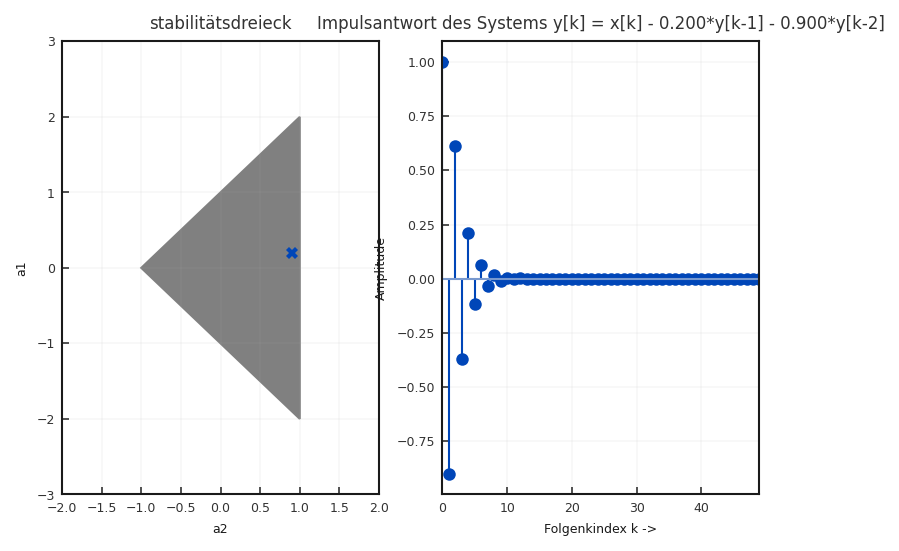

In [1]:
# This script creates an interactive graphic, where the user can set a1 and a2 coeffitients by clicking a point in left graph. The right graph will show the corresponding impulse response of the defined system

import matplotlib
import numpy 
from matplotlib import pyplot
from myst_nb import glue

matplotlib.style.use('sv.mplstyle')


def impulse(num_samples, a2, a1):
    '''calculates the impulse response of length num_samles for the two recursive factors a1, and a2'''
    x = numpy.zeros(num_samples)
    x[0] = 1.
    y = numpy.zeros(num_samples)
    for idx in range(num_samples):
        y[idx] = x[idx] - a1*y[idx-1] - a2*y[idx-2]
    return y
    
def onclick(event):
    '''on click the mark is set in the stability triangle and the resulting impulse response is calculated and displayed'''
    a1 = event.ydata
    a2 = event.xdata
    ax_stab.lines[0].set_data(a2, a1)
    y = impulse(num_samples, a2, a1)
    ax_impuls.cla()
    ax_impuls.stem(y, use_line_collection=True)
    ax_impuls.set(xlabel='Folgenkindex k ->', ylabel='Amplitude', title=f'Impulsantwort des Systems y[k] = x[k] - {a1:.3f}*y[k-1] - {a2:.3f}*y[k-2]', xlim=[0, num_samples-1], ylim=[-y.max(), y.max()])
    pyplot.draw()
    fig.canvas.draw_idle()

# creates triangle
edges = numpy.array([[-1, 0],[1, -2],[1, 2]])
triangle = pyplot.Polygon(edges[:], color='grey')

# coefficient values
a1 = 0.2
a2 = 0.9

# subplot figure
fig, (ax_stab, ax_impuls) = pyplot.subplots(1, 2)

# Stability Plot
ax_stab.add_patch(triangle)
ax_stab.set(xlabel='a2', ylabel='a1', title='stabilitätsdreieck', xlim=[-2, 2], ylim=[-3, 3])
ax_stab.plot(a2, a1, 'X')

# Impulse Plot
num_samples = 50
y = impulse(num_samples, a1, a2)
ax_impuls.stem(y, use_line_collection=True)
ax_impuls.set(xlabel='Folgenkindex k ->', ylabel='Amplitude', title=f'Impulsantwort des Systems y[k] = x[k] - {a1:.3f}*y[k-1] - {a2:.3f}*y[k-2]', xlim=[0, num_samples-1])

# Execute onclick when button is pressed
cid = fig.canvas.mpl_connect('button_press_event', onclick)

glue("Stabildreieck", fig, display=False)


```{glue:figure} Stabildreieck
:figwidth: 75%
:name: "fig:Stabildreieck"

Stabilitätsdreieck für Systeme zweiter
Ordnung mit den Koeffizienten $a_1$ und $a_2$.
```

## Matlab und z-Transformation

```{admonition} To Do
:class: error
poly roots Anwendung erklaren

zplane als Anzeige Tool
```

## Übungen

### Wiederholung des Stoffes und einfache Rechenaufgaben

1.  Welche Bedingungen müssen gelten, damit ein LTI-System stabil ist?

2.  Welche Beschreibungen eines LTI-Systems kennen Sie?

3.  Warum ist die Angabe der z-Transformationsfunktion nicht
    ausreichend?

4.  [\[Aufg:zTrafo:Stabilitaet\]]{#Aufg:zTrafo:Stabilitaet
    label="Aufg:zTrafo:Stabilitaet"}Testen Sie die folgenden LTI -
    Systeme auf Stabilität:

    1.  $y(k) = -2 y(k-1) + 1.5 x(k) - 2x(k-1)$

    2.  $y(k) =  2.5 x(k-1) + 1.83 y(k-1)  - 0.99y(k-2)$

    3.  $y(k) =  0.3 x(k) + 07 x(k-1) + 1.9812 y(k-1)   - 1.0201 y(k-2)$

5.  Zeigen Sie, dass die Ungleichung {eq}`eq:SOS:Ungleichung2` gilt.

(sec:Aufgaben)=
### Aufgaben (Auf Klausurniveau)

1.  Zeigen Sie, dass die z-Transformation eine lineare Transformation
    ist, indem Sie den Linearitätstest durchführen.

2.  Welchen Wert hat das folgende System nach
    50 Schritten. Geben Sie die direkte Berechnungsmethode an. Ist das
    System BIBO-stabil?\
    $y(k) = \sqrt(2) y(k-1) -  y(k-2) + 0.5 \delta(k)$

3.  Sind die folgenden Systeme kausal, stabil, linear und zeitinvariant?
    Begründen Sie ihre Antwort (auch wenn Sie keine Aussage machen
    können) mathematisch oder textuell (16)!

    1.  $y(k) = 0.5 y(k-1) - 0.3 y(k-2) k + 0.4 x(k) - 0.5
                x(k-1)x(k-2)$

    2.  $y(k+1) = 1.1 y(k-1) - 0.5 x(k+1) + 0.3 x(k) - 0.5
                x(k-1)$

    3.  $y(k+1) = 2x(2k-k) - y(k+1) + 4 x(k-2) + 1.8 y(k-1)$

    4.  $y(k) = 0.3 x(k) + 0.6x(k-1) - 0.7 x(k-2)y(k-2) + x(2k-2)$

4.  Ist das folgende Systeme kausal, stabil, linear und zeitinvariant?
    Begründen Sie ihre Antwort mathematisch oder textuell! Falls Sie
    keine Aussage treffen können, begründen Sie auch dies!
    $y(k+1) - 2y(k+2) + \alpha x(k+2) + x(k+1) =  1.99 y(k)$\
    Nehmen Sie an $\alpha = 2$ (8 Punkte). Für welche Bereiche von
    $\alpha$ (rein reell) ist das System stabil (Begründung)? (2 Punkte)

5.  Sind die beiden folgenden Systeme kausal, stabil, linear und
    zeitinvariant? Begründen Sie ihre Antwort mathematisch oder
    textuell! Falls Sie keine Aussage treffen können, begründen Sie auch
    dies!

    1.  $y(k) + \beta^2 y(k-2) + x(k-2) = 2 x(k) - 2x(k-2) - 1.9
            y(k-1)$.\
        Zur Beantwortung der Frage nehmen Sie an $\beta = \sqrt{0.5}$ (8
        Punkte).\
        Für welche Bereiche von $\beta$ ist das System stabil bzw.
        instabil (4 Punkte).

    2.  $2y(k) - 3.7x(-k-2)k -0.3y(k-3) = 10x(k-10)$. (8 Punkte)

### Matlab-Aufgaben

1.  Lösen Sie die Aufgabe
    [\[Aufg:zTrafo:Klausurniveau\]](#Aufg:zTrafo:Klausurniveau){reference-type="ref"
    reference="Aufg:zTrafo:Klausurniveau"}.[\[Aufg:zTrafo:zTrafo\]](#Aufg:zTrafo:zTrafo){reference-type="ref"
    reference="Aufg:zTrafo:zTrafo"} durch den Aufbau des Systems und
    Iteration.

2.  Programmieren Sie eine Funktion, die einen Pol-Nullstellenplan
    zeichnet und zusätzlich im Titel den $b_0$-Koeffizienten ausgibt.
    Nutzen Sie als Anhaltspunkt die `zplane` Funktion von Matlab.
    Hinweis: Sie benötigen den `axis` Befehl um eine quadratische Grafik
    aufzubauen (siehe help). Sie sollten die `mpoles` Funktion nutzen,
    um Mehrfach Null- bzw. Polstellen herauszufinden.

3.  Schreiben Sie eine Funktion, die es ermöglicht Systeme durch eine
    grafische Eingabe mit der Maus zu definieren. Zeichnen Sie dazu den
    Einheitskreis in eine figure. Hinweis: Sie benötigen den `ginput`
    Befehl für die Maus-Eingabe und `axis`, um eine quadratische Grafik
    zu erzeugen.

### Transfer-Leistung

1.  Wie sieht das Konvergenzgebiet für endliche Folgen aus?

2.  

3.  

## Zusammenfassung

Die wichtigen Erkenntnisse aus diesem Kapitel sind:

-   Die Systemfunktion ist eine vollständige Beschreibung eines
    LTI-Systems

-   Die Systemfunktion ist die z-Transformierte der Impulsantwort

-   Die Angabe der z-Transformation ist nur mit ROC vollständig.

-   Das Pol-Nullstellendiagramm ist bis auf die Grundverstärkung $b_0$
    eine vollständige Beschreibung eines LTI-Systems

-   Die Stabilität eines kausalen LTI-Systems lässt sich in der z-Ebene
    durch die Berechnung der Polradien einfach testen. Es muss gelten,
    dass alle Radien kleiner eins sind. Für strikt nicht-kausale Systeme
    müssen alle Radien größer eins sein, um ein stabiles System
    darzustellen.

-   Bei Systemen zweiter Ordnung müssen um stabile kausale Systeme zu
    realisieren, die rekursiven Koeffizienten $a_1$ und $a_2$ im
    Stabilitätsdreieck liegen.

-   Pol- bzw. Nullstellen reeller Systeme sind entweder reellwertig oder
    treten als konjugiert komplexe Polpaare auf.


[^1]: Würde gelten $M>N$ könnte man durch Polynomdivision eine
    Übertragungsfunktion erhalten, die aus einem simplen Polynom und
    einer gebrochen rationalen Funktion mit $M\leq N$ besteht, wobei das
    Polynom ein Polynom in $z$ und nicht in $z^{-1}$ wäre und somit bei
    einer z-Rücktransformation auf einen nicht-kausalen Anteil führen
    würde.
